In [19]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [20]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

In [32]:
df = aux.load_data(Path("../results_synced/stride/"))
df["target_best_model"].str.split("/").str[5].str[6:].str.split("-").str[0]

0      87
1      83
2      81
3      34
4     110
5     104
6      85
7     111
8       0
9     106
10      0
11      0
12      0
13      0
14      0
15      0
16     53
17     27
18     15
19    118
20     55
21     19
22     44
23     37
24     48
25      8
26      0
27     24
28     26
29    102
30     24
31    114
32      2
33    112
34      3
35    118
36     80
37    117
38      0
39     59
40      0
41      0
42      0
43      0
44      0
45    117
Name: target_best_model, dtype: object

In [24]:
dfp = df.groupby(["dataset", "arch", "window_stride", "pretrained"])[["target_val_acc", "target_test_acc"]].mean().reset_index()
dfp

,dataset,arch,window_stride,pretrained,target_val_acc,target_test_acc
0,Coffee,CNN_DFS,1,False,0.446875,0.440755
1,Coffee,CNN_DFS,1,True,0.524219,0.523220
2,Coffee,CNN_DFS,2,False,0.446875,0.444010
3,Coffee,CNN_DFS,2,True,0.446875,0.440430
4,Coffee,CNN_DFS,3,False,0.446875,0.442871
5,Coffee,ResNet_DFS,1,False,0.665313,0.560752
6,GunPoint,CNN_DFS,1,False,0.668555,0.665829
7,GunPoint,CNN_DFS,1,True,0.659082,0.636923
8,GunPoint,CNN_DFS,2,False,0.669271,0.658741
9,GunPoint,ResNet_DFS,1,False,0.653027,0.619022


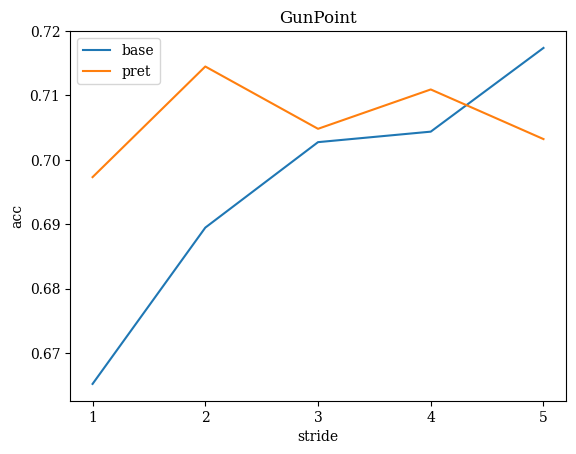

In [ ]:
archs = ['CNN_DFS', 'ResNet_DFS']
dsets = ['Coffee', 'GunPoint', 'PowerCons', "Plane", "CBF"]

n_rows = len(dsets)
n_cols = len(archs)

fig = plt.figure(figsize=[3*n_cols, 3*n_rows])
gs = fig.add_gridspec(n_rows, n_cols, 
    left=0.03, right=0.98, bottom=0.04,
    wspace=0., hspace=0
    )

metric = "acc"

colors = {
    "GunPoint": "blue",
    "Coffee": "red",
    "PowerCons": "purple",
    "Plane": "green",
    "CBF": "orange"
}

axes: dict[str, plt.Axes] = {}
for i, arch in enumerate(archs):
    for j, dset in enumerate(dsets):
        axes[f"{arch}_{dset}"] = fig.add_subplot(gs[j,i])

for arch_dset in axes:
    
    ax = axes[arch_dset]
    
    ax.set_xlim(15, 105)
    ax.set_xticks(np.arange(20,101,20))

    ax.set_ylim(-15, 15)
    
    ax.grid(axis="y")

    if archs[0] not in arch_dset:
        ax.set_yticklabels([])

    if dsets[-1] not in arch_dset:
        ax.set_yticks([-10, -5, 0, 5, 10, 15])
        ax.set_xticklabels([])
    else:
        ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])

    ax.annotate(arch_dset, (0.05, 0.05), xycoords='axes fraction', va='center')


for (arch, dset, nsamp_tra), dfg in dfpb.groupby(["arch", "dataset", "nsamp_tra"]):
    x_values = [20, 40, 60, 80, 100]
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], dfg[f"target_test_{metric}_mean"]*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[dset])

for (arch, dset), dfg in dfpb.groupby(["arch", "dataset"]):
    x_values = [20, 40, 60, 80, 100]
    data = dfg.groupby("nsamp_pre").apply(lambda x: np.average(x[f"target_test_{metric}_mean"], weights=x[f"target_test_{metric}_std"]))
    axes[f"{arch}_{dset}"].errorbar(x_values[:len(dfg)], data*100, 
        #yerr=dfg[f"target_test_{metric}_std"],         
        label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c="black", lw=5)


fig.text(0,0.5, s= f"abs % {metric}", rotation="vertical", ha="center", va="center");
fig.text(0.5,0, s= "% of pretrain data used", rotation="horizontal", ha="center", va="center");

    
print(dfpb.groupby(["arch", "dataset"]).last()[f"target_test_{metric}_mean"])